## 2.2 建立简单分类器
### 2.2.1 详细步骤

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X=np.array([[3,1],[2,5],[1,8],[6,4],[5,2],[3,5],[4,7],[4,-1]])
y=[0,1,1,0,0,1,1,0]

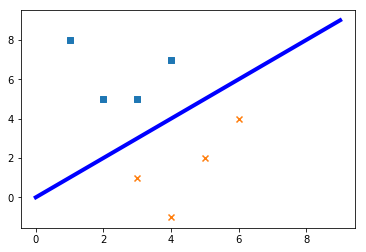

In [11]:
class_0=np.array([X[i] for i in range(len(X)) if y[i]])
class_1=np.array([X[i] for i in range(len(X)) if not y[i]])
plt.scatter(class_0[:,0],class_0[:,1],marker='s')
plt.scatter(class_1[:,0],class_1[:,1],marker='x')
x=range(10)
plt.plot(x,x,'b-',linewidth=4)


## 2.3 建立逻辑回归分类器

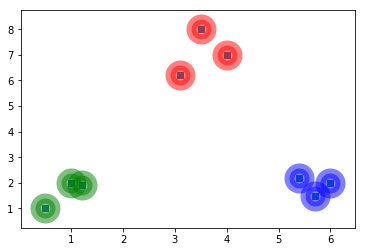

In [32]:
from sklearn import  linear_model

X = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2],
[1.2, 1.9], [6, 2], [5.7, 1.5], [5.4, 2.2]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])
color=['r','g','b']
classify=linear_model.LogisticRegression(solver='liblinear',C=100)
classify.fit(X,y)

#简单查看数据类别情况
plt.scatter(X[:,0],X[:,1],marker='s')
for i in range(len(X)):
    plt.scatter(X[i,0],X[i,1],s=400,alpha=0.5,color=color[y[i]],linewidths=10,marker='o')

In [39]:
def plot_classify(classifier,X,y):
    #定义数值范围 增加余量1.0
    x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
    #定义边界，通过网格数据求解方程
    step_size=0.01
    x_values,y_values=np.meshgrid(np.arange(x_min,x_max,step_size),
                                  np.arange(y_min,y_max,step_size))
    mesh_output=classifier.predict(np.c_[x_values.ravel(),y_values.ravel()])
    mesh_output=mesh_output.reshape(x_values.shape)
    
    
    #c=y表示颜色的使用顺序。用目标标记映射cmap的颜色表。我们肯定 希望不同的标记使用不同的颜色，因此，用y作为映射
    plt.figure()
    plt.pcolormesh(x_values,y_values,mesh_output,cmap=plt.cm.hot)
    plt.scatter(X[:,0],X[:,1],c=y,s=80,edgecolors='black',linewidths=1,cmap=plt.cm.Paired)

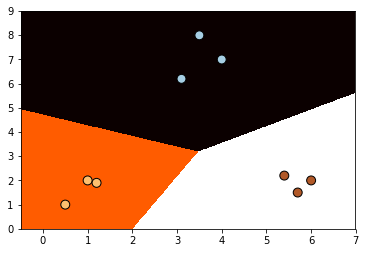

In [40]:
plot_classify(classify,X,y)